In [44]:
from cProfile import label
from cmath import exp, pi
from numpy import tan, sin, sqrt,cos,arctan,arcsin,arccos,cos
from re import A
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as npy
from scipy.signal import savgol_filter
from matplotlib.pyplot import MultipleLocator
from iminuit import Minuit
from matplotlib import cm
import iminuit
from iminuit.cost import LeastSquares
# import latex
# plt.style.reload_library()
plt.style.use(['science'])
# plt.style.use(['science','ieee'])
# plt.style.use(['science','no-latex'])

In [45]:

def calculate_index(phi,delta):
    phi=float(phi*pi/180)
    delta=float(delta*pi/180)
    anglei=63/180*pi
    rho=tan(phi)*exp(delta*1j)
    n1=1.
    # print('rho',rho)
    epsilon= (n1**2) * (sin(anglei)**2) * ( 1+(tan(anglei)**2)*((1-rho)/(1+rho))**2) 
    ep_re=epsilon.real
    ep_im=epsilon.imag
    n2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) +ep_re)).real
    k2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) -ep_re)).real
    return n2,k2
print(calculate_index(phi=9.670275136759292,delta=25.09868196093535))
            
def Fun(x,a0,a1,a2,k,b): #define fit function
    phi=k*x+b
    # return a0+a1*npy.cos(2*phi)
    return a0+a1*npy.cos(2*phi)+ a2*npy.sin(2*phi)

Ps=0.06229909767721363 
As=0.021611605317322594
anglei=63/180*pi
# anglei=65/180*pi

def intensity_fun(A,f0,f1,f2): #define fit function
    A=A-As
    # return a0+a1*npy.cos(2*phi)
    return f0+f1*npy.cos(2*A)+ f2*npy.sin(2*A)
def calculate_tanphi_cosdelta(n,k,anglei1):
    
    n1=1
    n2=n+k*1j
    anglei2=arcsin(n1*sin(anglei1)/n2 )
    rp=tan(anglei1-anglei2)/tan(anglei1+anglei2)
    rs=sin(anglei2-anglei1)/sin(anglei2+anglei1)
    rho=rp/rs
    tanphi=npy.abs(rho)
    delta=npy.arccos(rho.imag/rho.real)
    
    return tanphi,npy.cos(delta)

def calculate_alpha_beta(tanphi,delta,P):
    P=P-Ps
    f0=tanphi**2*cos(P)**2+sin(P)**2
    f1=tanphi**2*cos(P)**2+sin(P)**2
    f2=2*tanphi*cos(delta)*sin(P)*cos(P)
    return f0,f1,f2

def ntointensity_max(n,k,anglei1,P):
    n1=1
    n2=n+k*1j
    anglei2=arcsin(n1*sin(anglei1)/n2 )
    rp=tan(anglei1-anglei2)/tan(anglei1+anglei2)
    rs=sin(anglei2-anglei1)/sin(anglei2+anglei1)
    rho=rp/rs
    tanphi=npy.abs(rho)
    delta=npy.arccos(rho.imag/rho.real)
    f0,f1,f2=calculate_alpha_beta(tanphi,delta,P)
    return f0,f1,f2
def intensity_max_change(n,k,anglei1,P):
    h=0.001
    max1,max2,max3=ntointensity_max(n+h,k,anglei,P)
    min1,min2,min3=ntointensity_max(n-h,k,anglei,P)
    return abs(max1-min1)/(2*h),abs(max2-min2)/(2*h),abs(max3-min3)/(2*h)
print(calculate_tanphi_cosdelta(1.47,0,anglei))

(1.5470662863708966, 0.15505363306457245)
(0.19860513063803745, 6.123233995736766e-17)


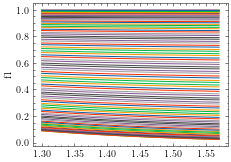

In [46]:
n_input=[(n*0.03+1.3) for n in range(10) ]
k_input=[0]*20
times=90
P=npy.array([pi/90*i for i in range(times)])
A=[pi/360*i for i in range(360)]
A=npy.array(A)


fig1,ax1=plt.subplots()
for j in range(times):
    fig,ax = plt.subplots()
    # alpha_input=[]
    # beta_input=[]
    f0_input=[]
    f1_input=[]
    f2_input=[]
    for i in range(10):
        tanphi,delta=calculate_tanphi_cosdelta(n_input[i],k_input[i],anglei)
        f0,f1,f2=calculate_alpha_beta(tanphi,delta,P[j])
        f0_input.append(f0)
        f1_input.append(f1)
        f2_input.append(f2)
        ax.plot(A,intensity_fun(A,f0,f1,f2),label='n='+str(round(n_input[i],2)),linewidth=0.7 )
    ax.set_xlabel('Angle A')
    ax.set_ylabel('Intensity')
    # ax.set_xlabel('')

    ax1.plot(n_input,f1_input,label="P="+str(round(P[j]*180/pi,0)))

    fig.legend(bbox_to_anchor=(0.95, 0.7), loc=2, borderaxespad=0)
    fig.patch.set_facecolor('white')
    # fig.savefig('../figure_I63/intensity_PreP'+str(round(P[j]/pi*180,1))+'.png',dpi=1000)
    plt.close()

    # fig,ax = plt.subplots(2,1,sharex=True)
    # ax[1].plot(n_input,alpha_input,label="$\\alpha$")
    # ax[0].plot(n_input,beta_input,label="$\\beta$")
    # ax[1].set_xlabel('Wave length (nm)')
    # fig.legend(bbox_to_anchor=(0.95, 0.7), loc=2, borderaxespad=0)
    # fig.patch.set_facecolor('white')
    # # fig.savefig('figure_I63/alphabeta_PreP'+str(round(P[j]/pi*180,1))+'.png',dpi=1000)
    # plt.close()
# ax1.legend()
# ax1.set_title("$\alpha$")
# fig1.patch.set_facecolor('white')
ax1.set_ylabel('f1')
# fig1.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0)
fig1.patch.set_facecolor('white')
fig1.savefig('../figure_I63/f1.png',dpi=1000)


In [47]:

# ax1.set_title("$\alpha$")
# fig1.legend(bbox_to_anchor=(0.95, 0.7), loc=1, borderaxespad=0)
# ax1.legend()
# fig1.patch.set_facecolor('white')
# fig1.savefig('alpha.png',dpi=1000)
# fig1.savefig('figure_I63/alpha.png',dpi=1000)


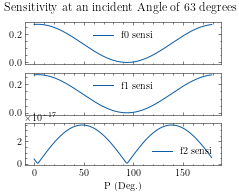

In [50]:
# A=[pi/360*i for i in range(360)]
# P=[pi/180*i for i in range(180)]
P=[pi/180*i for i in range(180)]
anglei_input=[pi/180*(i+1) for i in range(88)]
# anglei_input=[pi/180*(i+30) for i in range(50)]
anglei=63/180*pi
P=npy.array(P)
ap=P/pi*180
sensitivity1,sensitivity2,sensitivity3=intensity_max_change(1.4,0,anglei,P)
fig,ax=plt.subplots(3,1,sharex=True)
ax[0].plot(ap,sensitivity1,label='f0 sensi')
ax[1].plot(ap,sensitivity2,label='f1 sensi')
ax[2].plot(ap,sensitivity3,label='f2 sensi')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[2].set_xlabel("P (Deg.)")
# ax.set_ylabel('f0 sensi.')
fig.suptitle('Sensitivity at an incident Angle of 63 degrees')
fig.patch.set_facecolor('white')
fig.savefig('../figure_I63/sensitivityVsP.png',dpi=1000)
# ax.set_xlim(0,20)
# fig.savefig('figure_I63/sensitivityVsP_enlarge.png',dpi=1000)


# n_input=npy.array(n_input)
# anglei_input=npy.array(anglei_input)
# ai=anglei_input/pi*180
# ai,ap=npy.meshgrid(ai,ap )
# anglei_input,P=npy.meshgrid(anglei_input, P)
# # maxintensity=ntointensity_max(1.3,0,anglei_input,P)
# maxintensity=intensity_max_change(1.3,0,anglei_input,P)
# fig,ax=plt.subplots()
# # cset1 = ax.contourf(ai,ap, maxintensity) 
# cset1 = ax.contourf(ai,ap, maxintensity[0],cmap=cm.jet) 
# ax.set_xlabel('Angle of incidence')
# ax.set_ylabel('Angle P')
# ax.set_title('Sensitivity')
# cbar = fig.colorbar(cset1)
# plt.show()
# fig.patch.set_facecolor('white')
# # fig.savefig('figure_pre/find_p_anglei_65Deg.png',dpi=1000)
# # fig.savefig('figure_pre/find_p_anglei.png',dpi=1000)
# # ax.set_xlim(64,66)
# # ax.set_xlim(45,65)
# # ax.set_ylim(0,15)
# # # fig.savefig('figure_pre/find_p_anglei_65Deg_enlarge.png',dpi=1000)
# # fig.savefig('figure_pre/find_p_anglei_enlarge.png',dpi=1000)

In [49]:
print(2.241/pi*180)

128.3998418888175
